<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/autoencoder/CNN_AUTOENCODER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1rsFeNH-ldl3-UCjRoEMUtuxPekRjTEgu?usp=sharing)

In [1]:

# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

# 랜덤 시드 고정
SEED=2021
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


(500, 155, 155, 3)
(500, 155, 155, 3)


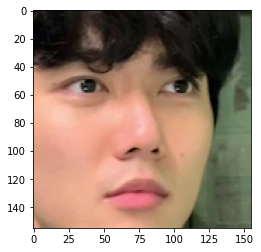

In [7]:
# 케라스에서 불러오기
import glob
paths = glob.glob('./drive/MyDrive/videoimage2/*.png')
#paths = np.random.permutation(paths)

test_data = np.array([plt.imread(paths[i]) for i in range(500)])
#validate_data = np.array([plt.imread(paths[i]) for i in range(801,900)])
plt.imshow(test_data[0].reshape((155,155,3)))


# 피처 스케일링
test_data = test_data/255.
#validate_data = validate_data/255.


#plt.imshow(test_data[0].reshape((222,223,3)))


print(test_data.shape)
print(test_data.shape)

In [9]:
# 오토인코더 모델 정의
def Autoencoder():
  #model = Sequnetial()

  X = tf.keras.layers.Input(shape=[155,155,3])
  input_img_padding = tf.keras.layers.ZeroPadding2D((2,2))(X)
  H = tf.keras.layers.Conv2D(128, kernel_size=3,activation='swish')(input_img_padding)
  H = tf.keras.layers.MaxPool2D()(H)

  H = tf.keras.layers.Conv2D(128, kernel_size=3,activation='swish')(H)
  H = tf.keras.layers.MaxPool2D()(H)

  H = tf.keras.layers.Conv2D(128, kernel_size=3,activation='swish')(H)
  H = tf.keras.layers.MaxPool2D()(H)

  pool_tmp = H.shape.as_list()
  pool_tmp=pool_tmp[1:]
  

  H = tf.keras.layers.Flatten()(H)
  flatten_tmp=H.shape.as_list()
  flatten_tmp=flatten_tmp[1]
  
  
 
  #decode
  H = tf.keras.layers.Dense(10,activation='swish')(H)
  H = tf.keras.layers.Dense(flatten_tmp,activation='swish')(H)
  H = Reshape(pool_tmp)(H)

  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(128,3,activation='swish')(H)
  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(3,3,activation='swish')(H)
  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(3,3,activation='swish')(H)
  decoded = tf.keras.layers.Cropping2D(cropping=((3, 0), (3, 0)), data_format=None)(H)

  model = tf.keras.models.Model(X,decoded)
  model.compile(optimizer='adam',loss='mean_squared_error')

  return model

ae_model = Autoencoder()
ae_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 155, 155, 3)]     0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 159, 159, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 157, 157, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 78, 78, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 76, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 128)       1475

In [10]:
# 오토인코더 모델 학습
history = ae_model.fit(test_data, test_data, batch_size=3, epochs=20, verbose=1)

ae_images = ae_model.predict(test_data)
ae_images.shape

Epoch 1/20
167/167 [=======================================] - 35s 25ms/step - loss: 9.9137e-07
Epoch 2/20
167/167 [==============================] - 4s 23ms/step - loss: 3.2233e-07
Epoch 3/20
167/167 [==============================] - 4s 23ms/step - loss: 3.0979e-07
Epoch 4/20
167/167 [==============================] - 4s 23ms/step - loss: 2.9999e-07
Epoch 5/20
167/167 [==============================] - 4s 23ms/step - loss: 3.0842e-07
Epoch 6/20
167/167 [==============================] - 4s 23ms/step - loss: 3.0553e-07
Epoch 7/20
167/167 [==============================] - 4s 23ms/step - loss: 3.2082e-07
Epoch 8/20
167/167 [==============================] - 4s 23ms/step - loss: 3.2137e-07
Epoch 9/20
167/167 [==============================] - 4s 23ms/step - loss: 3.0001e-07
Epoch 10/20
167/167 [==============================] - 4s 23ms/step - loss: 3.2017e-07
Epoch 11/20
167/167 [==============================] - 4s 23ms/step - loss: 3.0981e-07
Epoch 12/20
167/167 [=====================

(500, 155, 155, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

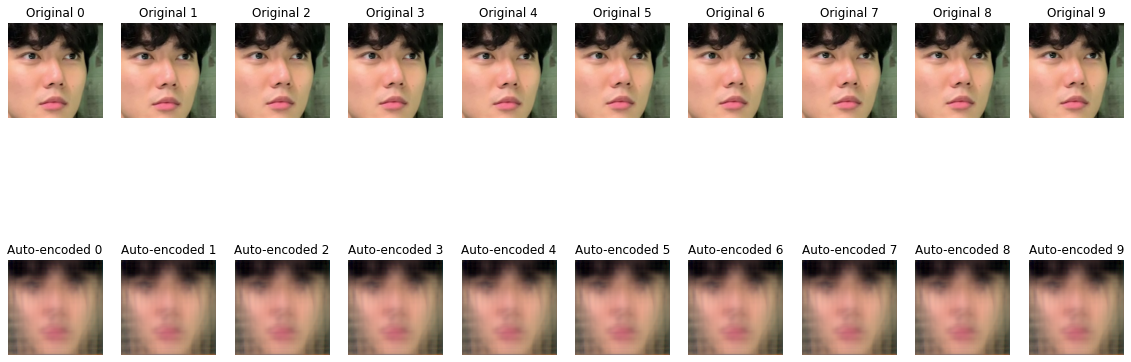

In [11]:
num = 10 
plt.figure(figsize=(20,8))
test_data = test_data*255;
ae_images=ae_images*255
for i in range(10):
    # 원본 이미지
    ax = plt.subplot(2, num, i+1)
    plt.imshow(test_data[i].reshape((155,155,3)))
    plt.title("Original %s" % str(i))
    plt.axis('off')
    
    # 복원 이미지
    ax = plt.subplot(2, num, i+num+1)
    plt.imshow(ae_images[i].reshape((155,155,3)))
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')
    
plt.show()